In [1]:
import numpy as np
import pandas as pd

cv=pd.read_csv(r'C:\Users\Diego\Desktop\finales\solo_patyvida.csv',sep=',')

In [2]:
#Definir las variables 
X=cv.iloc[:,((cv.columns!='y')&(cv.columns!='y2')&(cv.columns!='cod_cia')&(cv.columns!='bloque')&(cv.columns!='tipo'))].copy()
y=cv['y'].copy()

In [3]:
#Importar modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [4]:
#Definicion del set de TEST 
X_test=X.iloc[2678:].copy()
y_test=y[2678:].copy()

In [5]:
#Instacia del modelo y definicion de parametros a probar
rf = RandomForestClassifier(random_state=23)

#Parametros a probar
param_trees = {'class_weight':[{1:0.7,0:0.3},{1:0.75,0:0.25},{1:0.8,0:0.2}],
                'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10,21], 
               'max_depth': [5, 20, 50, 70], 
               'min_samples_leaf':[1, 5, 8, 10, 30]}

<h3>Prueba con 5 períodos</h3>

In [7]:
#Definimos las k-fold
custom_cv1 = list(zip([np.arange(0,643),np.arange(128,773),np.arange(256,903),np.arange(384,1033),np.arange(513,1163),
                     np.arange(643,1297),np.arange(773,1431),np.arange(903,1565)],
                     [np.arange(1033,1163),np.arange(1163,1297),np.arange(1297,1431),np.arange(1431,1565),np.arange(1565,1699),
                     np.arange(1699,1834),np.arange(1834,1971),np.arange(1971,2112)]))

In [8]:
grid1=GridSearchCV(rf,param_trees,scoring='roc_auc',cv=custom_cv1,verbose=2,n_jobs=4)
grid1.fit(X,y)

Fitting 8 folds for each of 900 candidates, totalling 7200 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   43.7s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 7200 out of 7200 | elapsed:  8.1min finished


GridSearchCV(cv=[(array([  0,   1, ..., 641, 642]), array([1033, 1034, ..., 1161, 1162])), (array([128, 129, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([256, 257, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 384,  385, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564]...5, ..., 1969, 1970])), (array([ 903,  904, ..., 1563, 1564]), array([1971, 1972, ..., 2110, 2111]))],
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0:

In [9]:
print(grid1.best_params_) 
print(grid1.best_score_)

{'class_weight': {1: 0.8, 0: 0.2}, 'max_depth': 5, 'max_features': 21, 'min_samples_leaf': 8, 'n_estimators': 200}
0.8671740816917276


In [22]:
#Testeo del problema en test
X1_train=X.iloc[np.arange(1565,2253)].copy()
y1_train=y[1565:2253].copy()

modelo1=RandomForestClassifier(class_weight={1: 0.8, 0: 0.2},max_depth=5,max_features=21, 
                               min_samples_leaf=8,n_estimators=200,random_state=23)

modelo1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.8, 0: 0.2},
            criterion='gini', max_depth=5, max_features=21,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=23,
            verbose=0, warm_start=False)

In [23]:
#Guardamos las variables para graficos
fpgs1,tpgs1,_=metrics.roc_curve(y_true=y_test,y_score=modelo1.predict_proba(X_test)[:,1])

In [24]:
print(metrics.classification_report(y_test,y_pred=modelo1.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=modelo1.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=modelo1.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.92      0.99      0.96       124
          1       0.91      0.50      0.65        20

avg / total       0.92      0.92      0.91       144

[[123   1]
 [ 10  10]]
0.8895161290322581


<h3>Prueba con 6 períodos</h3>

In [13]:
#Definimos las k-fold
custom_cv2 = list(zip([np.arange(0,773),np.arange(128,903),np.arange(256,1033),np.arange(384,1163),np.arange(513,1297),
                     np.arange(643,1431)],
                     [np.arange(1163,1297),np.arange(1297,1431),np.arange(1431,1565),np.arange(1565,1699),
                     np.arange(1699,1834),np.arange(1834,1971)]))

In [14]:
grid2=GridSearchCV(rf,param_trees,scoring='roc_auc',cv=custom_cv2,verbose=2,n_jobs=4)
grid2.fit(X,y)

Fitting 6 folds for each of 900 candidates, totalling 5400 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   24.4s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   45.7s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 5400 out of 5400 | elapsed:  6.9min finished


GridSearchCV(cv=[(array([  0,   1, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([128, 129, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 256,  257, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 384,  385, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 513,  514, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833])), (array([ 643,  644, ..., 1429, 1430]), array([1834, 1835, ..., 1969, 1970]))],
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'class

In [15]:
print(grid2.best_params_) 
print(grid2.best_score_)

{'class_weight': {1: 0.8, 0: 0.2}, 'max_depth': 20, 'max_features': 21, 'min_samples_leaf': 10, 'n_estimators': 200}
0.8876883655040373


In [16]:
#Testeo del problema en test
X2_train=X.iloc[np.arange(1431,2253)].copy()
y2_train=y[1431:2253].copy()

modelo2=RandomForestClassifier(class_weight={1: 0.8, 0: 0.2},max_depth=50,max_features=21, 
                               min_samples_leaf=10,n_estimators=100,random_state=23)

modelo2.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.8, 0: 0.2},
            criterion='gini', max_depth=50, max_features=21,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=23,
            verbose=0, warm_start=False)

In [17]:
#Guardamos las variables para graficos
fpgs2,tpgs2,_=metrics.roc_curve(y_true=y_test,y_score=modelo2.predict_proba(X_test)[:,1])

In [18]:
print(metrics.classification_report(y_test,y_pred=modelo2.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=modelo2.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=modelo2.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.93      0.98      0.96       124
          1       0.85      0.55      0.67        20

avg / total       0.92      0.92      0.92       144

[[122   2]
 [  9  11]]
0.8782258064516129


<h3>Prueba con 7 períodos</h3>

In [19]:
#Definimos las k-fold
custom_cv3 = list(zip([np.arange(0,903),np.arange(128,1033),np.arange(256,1163),np.arange(384,1297)],
                     [np.arange(1297,1431),np.arange(1431,1565),np.arange(1565,1699),np.arange(1699,1834)]))

In [21]:
grid3=GridSearchCV(rf,param_trees,scoring='roc_auc',cv=custom_cv3,verbose=2,n_jobs=4)
grid3.fit(X,y)

Fitting 4 folds for each of 900 candidates, totalling 3600 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   30.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   56.5s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 3600 out of 3600 | elapsed:  5.3min finished


GridSearchCV(cv=[(array([  0,   1, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 128,  129, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 256,  257, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 384,  385, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833]))],
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 21], 'max_depth': [5, 

In [25]:
print(grid3.best_params_) 
print(grid3.best_score_)

{'class_weight': {1: 0.8, 0: 0.2}, 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 200}
0.9414384650773335


In [26]:
#Testeo del problema en test
X3_train=X.iloc[np.arange(1297,2253)].copy()
y3_train=y[1297:2253].copy()

modelo3=RandomForestClassifier(class_weight={1: 0.8, 0: 0.2},max_depth=5,max_features=21, 
                               min_samples_leaf=1,n_estimators=200,random_state=23)

modelo3.fit(X3_train,y3_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.8, 0: 0.2},
            criterion='gini', max_depth=5, max_features=21,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=23,
            verbose=0, warm_start=False)

In [27]:
#Guardamos las variables para graficos
fpgs3,tpgs3,_=metrics.roc_curve(y_true=y_test,y_score=modelo3.predict_proba(X_test)[:,1])

In [28]:
print(metrics.classification_report(y_test,y_pred=modelo3.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=modelo3.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=modelo3.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.92      0.99      0.96       124
          1       0.91      0.50      0.65        20

avg / total       0.92      0.92      0.91       144

[[123   1]
 [ 10  10]]
0.8713709677419355


<h3>Prueba con 8 períodos</h3>

In [29]:
#Definimos las k-fold
custom_cv4 = list(zip([np.arange(0,1033),np.arange(128,1163)],
                     [np.arange(1431,1565),np.arange(1565,1699)]))

In [30]:
grid4=GridSearchCV(rf,param_trees,scoring='roc_auc',cv=custom_cv4,verbose=2,n_jobs=4)
grid4.fit(X,y)

Fitting 2 folds for each of 900 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   35.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:  3.0min finished


GridSearchCV(cv=[(array([   0,    1, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 128,  129, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698]))],
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 21], 'max_depth': [5, 20, 50, 70], 'min_samples_leaf': [1, 5, 8, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', ve

In [31]:
print(grid4.best_params_) 
print(grid4.best_score_)

{'class_weight': {1: 0.8, 0: 0.2}, 'max_depth': 5, 'max_features': 21, 'min_samples_leaf': 1, 'n_estimators': 50}
0.9630238813565484


In [41]:
#Testeo del problema en test
X4_train=X.iloc[np.arange(1163,2253)].copy()
y4_train=y[1163:2253].copy()

modelo4=RandomForestClassifier(class_weight={1: 0.8, 0: 0.2},max_depth=5,max_features=21, 
                               min_samples_leaf=1,n_estimators=50,random_state=23)

modelo4.fit(X4_train,y4_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.8, 0: 0.2},
            criterion='gini', max_depth=5, max_features=21,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=23,
            verbose=0, warm_start=False)

In [42]:
#Guardamos las variables para graficos
fpgs4,tpgs4,_=metrics.roc_curve(y_true=y_test,y_score=modelo4.predict_proba(X_test)[:,1])

In [43]:
print(metrics.classification_report(y_test,y_pred=modelo4.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=modelo4.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=modelo4.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.92      0.99      0.95       124
          1       0.90      0.45      0.60        20

avg / total       0.92      0.92      0.90       144

[[123   1]
 [ 11   9]]
0.8737903225806452


<h2>Grafico Resumen - Random Forest</h2>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set('talk', 'whitegrid', 'dark', font_scale=1, font='serif',
        rc={"lines.linewidth": 1, 'grid.linestyle': '--'},)

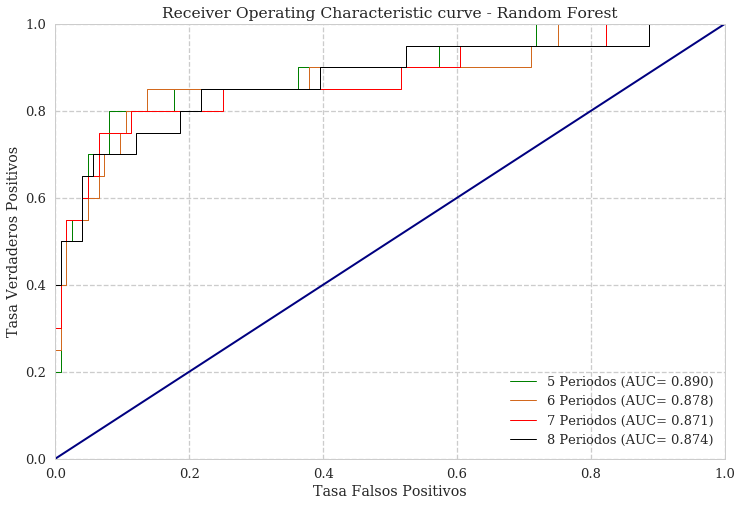

In [45]:
plt.figure(figsize=(12,8))
plt.plot(fpgs1,tpgs1, color='g',
         lw=1, label='5 Periodos (AUC= %0.3f)' % metrics.auc(fpgs1,tpgs1))
plt.plot(fpgs2,tpgs2, color='chocolate',
         lw=1, label='6 Periodos (AUC= %0.3f)' % metrics.auc(fpgs2,tpgs2))
plt.plot(fpgs3,tpgs3, color='red',
         lw=1, label='7 Periodos (AUC= %0.3f)' % metrics.auc(fpgs3,tpgs3))
plt.plot(fpgs4,tpgs4, color='k',
         lw=1, label='8 Periodos (AUC= %0.3f)' % metrics.auc(fpgs4,tpgs4))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Receiver Operating Characteristic curve - Random Forest')
plt.legend()#(loc="right")
plt.show()

<h3>Prueba diferentes niveles de umbral</h3>

In [46]:
#Guardamos los resultados por pruebas
rango=np.arange(2678,2822)

result_1=pd.DataFrame(data={'prueba':1,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':modelo1.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_2=pd.DataFrame(data={'prueba':2,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':modelo2.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_3=pd.DataFrame(data={'prueba':3,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':modelo3.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_4=pd.DataFrame(data={'prueba':4,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':modelo4.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_random_forest=pd.concat([result_1,result_2,result_3,result_4],ignore_index=False)

In [47]:
#Generamos las diferentes columnas
result_random_forest['15']=result_random_forest['score'].apply(lambda x: 1 if x>0.15 else 0)
result_random_forest['20']=result_random_forest['score'].apply(lambda x: 1 if x>0.20 else 0)
result_random_forest['25']=result_random_forest['score'].apply(lambda x: 1 if x>0.25 else 0)
result_random_forest['30']=result_random_forest['score'].apply(lambda x: 1 if x>0.30 else 0)

<h5>5 Periodos - 15,20,25,30</h5>

In [ ]:
#Aca van todas las pruebas

<h2>Pruebas de Ligthgbm</h2>

In [48]:
import lightgbm as lgb
import scipy.stats as st

In [57]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

parametros_lgb = {  
    'class_weight':[{1:0.7,0:0.3},{1:0.75,0:0.25},{1:0.8,0:0.2}],
    "n_estimators": st.randint(20,330), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 20),  # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [58]:
model_lgb = lgb.LGBMClassifier(random_state=23)

<h3>Prueba con 5 períodos - LGB</h3>

In [59]:
rnds=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv1,scoring='roc_auc', verbose= 2,n_jobs=4)
rnds.fit(X,y)

Fitting 8 folds for each of 400 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   31.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:   47.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  2.4min finished


RandomizedSearchCV(cv=[(array([  0,   1, ..., 641, 642]), array([1033, 1034, ..., 1161, 1162])), (array([128, 129, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([256, 257, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 384,  385, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564]...5, ..., 1969, 1970])), (array([ 903,  904, ..., 1563, 1564]), array([1971, 1972, ..., 2110, 2111]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
          param_distributions={'class_weight': [{1: 0.7, 0: 0.3}, {1

In [60]:
print(rnds.best_params_)
print(rnds.best_score_)

{'class_weight': {1: 0.8, 0: 0.2}, 'colsample_bytree': 0.6858092486147319, 'gamma': 6.614036272691791, 'learning_rate': 0.1920712614919678, 'max_depth': 8, 'min_child_weight': 5.7371288837302306, 'n_estimators': 263, 'reg_alpha': 0.864879800264674, 'subsample': 0.9281419929041732}
0.8806975875234881


In [61]:
#Testeo del problema en test
opt_lgbm1 = rnds.best_estimator_
opt_lgbm1.fit(X1_train,y1_train)

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.8, 0: 0.2},
        colsample_bytree=0.6858092486147319, gamma=6.614036272691791,
        learning_rate=0.1920712614919678, max_depth=8,
        min_child_samples=20, min_child_weight=5.7371288837302306,
        min_split_gain=0.0, n_estimators=263, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=0.864879800264674,
        reg_lambda=0.0, silent=True, subsample=0.9281419929041732,
        subsample_for_bin=200000, subsample_freq=0)

In [62]:
#Guardamos las variables para graficos
fps1,tps1,_=metrics.roc_curve(y_true=y_test,y_score=opt_lgbm1.predict_proba(X_test)[:,1])

In [63]:
print(metrics.classification_report(y_test,y_pred=opt_lgbm1.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=opt_lgbm1.predict(X_test)))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=opt_lgbm1.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       124
          1       0.71      0.60      0.65        20

avg / total       0.90      0.91      0.91       144

[[119   5]
 [  8  12]]
ROC-AUC: 0.8875000000000001


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h3>Prueba con 6 períodos - LGB</h3>

In [64]:
rnds2=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv2,scoring='roc_auc', verbose= 2,n_jobs=4)
rnds2.fit(X,y)

Fitting 6 folds for each of 400 candidates, totalling 2400 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   37.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 2400 out of 2400 | elapsed:  2.1min finished


RandomizedSearchCV(cv=[(array([  0,   1, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([128, 129, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 256,  257, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 384,  385, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 513,  514, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833])), (array([ 643,  644, ..., 1429, 1430]), array([1834, 1835, ..., 1969, 1970]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
        

In [65]:
print(rnds2.best_params_)
print(rnds2.best_score_)

{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.9999024533925382, 'gamma': 4.78088724452536, 'learning_rate': 0.13678680762166995, 'max_depth': 16, 'min_child_weight': 8.63678437515951, 'n_estimators': 111, 'reg_alpha': 1.9915610007372486, 'subsample': 0.7471511606841598}
0.9036182549680201


In [66]:
#Testeo del problema en test
opt_lgbm2 = rnds2.best_estimator_
opt_lgbm2.fit(X2_train,y2_train)

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.75, 0: 0.25},
        colsample_bytree=0.9999024533925382, gamma=4.78088724452536,
        learning_rate=0.13678680762166995, max_depth=16,
        min_child_samples=20, min_child_weight=8.63678437515951,
        min_split_gain=0.0, n_estimators=111, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=1.9915610007372486,
        reg_lambda=0.0, silent=True, subsample=0.7471511606841598,
        subsample_for_bin=200000, subsample_freq=0)

In [67]:
#Guardamos las variables para graficos
fps2,tps2,_=metrics.roc_curve(y_true=y_test,y_score=opt_lgbm2.predict_proba(X_test)[:,1])

In [68]:
print(metrics.classification_report(y_test,y_pred=opt_lgbm2.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=opt_lgbm2.predict(X_test)))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=opt_lgbm2.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95       124
          1       0.75      0.60      0.67        20

avg / total       0.91      0.92      0.91       144

[[120   4]
 [  8  12]]
ROC-AUC: 0.8834677419354838


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h3>Prueba con 7 períodos - LGB</h3>

In [69]:
rnds3=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv3,scoring='roc_auc', verbose= 2,n_jobs=4)
rnds3.fit(X,y)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   22.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   37.7s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:   59.1s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  1.5min finished


RandomizedSearchCV(cv=[(array([  0,   1, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 128,  129, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 256,  257, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 384,  385, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
          param_distributions={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimators': <scipy.stats._distn_infrastructure.rv_f

In [70]:
print(rnds3.best_params_)
print(rnds3.best_score_)

{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.9462871869553285, 'gamma': 4.525893890479748, 'learning_rate': 0.2242225789687013, 'max_depth': 6, 'min_child_weight': 8.792831059343591, 'n_estimators': 98, 'reg_alpha': 2.062966892588924, 'subsample': 0.8477477181997286}
0.9546921091951126


In [71]:
#Testeo del problema en test
opt_lgbm3 = rnds3.best_estimator_
opt_lgbm3.fit(X3_train,y3_train)

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.75, 0: 0.25},
        colsample_bytree=0.9462871869553285, gamma=4.525893890479748,
        learning_rate=0.2242225789687013, max_depth=6,
        min_child_samples=20, min_child_weight=8.792831059343591,
        min_split_gain=0.0, n_estimators=98, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=2.062966892588924,
        reg_lambda=0.0, silent=True, subsample=0.8477477181997286,
        subsample_for_bin=200000, subsample_freq=0)

In [72]:
#Guardamos las variables para graficos
fps3,tps3,_=metrics.roc_curve(y_true=y_test,y_score=opt_lgbm3.predict_proba(X_test)[:,1])

In [73]:
print(metrics.classification_report(y_test,y_pred=opt_lgbm3.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=opt_lgbm3.predict(X_test)))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=opt_lgbm3.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       124
          1       0.76      0.65      0.70        20

avg / total       0.92      0.92      0.92       144

[[120   4]
 [  7  13]]
ROC-AUC: 0.8834677419354838


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h3>Prueba con 8 períodos - LGB</h3>

In [74]:
rnds4=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv4,scoring='roc_auc', verbose= 2,n_jobs=4)
rnds4.fit(X,y)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   23.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   40.7s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:   50.4s finished


RandomizedSearchCV(cv=[(array([   0,    1, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 128,  129, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
          param_distributions={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029F9BF05278>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029F9BF05F98>, 'learning_rate': <scipy...

In [75]:
print(rnds4.best_params_)
print(rnds4.best_score_)

{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.9477449632584963, 'gamma': 0.25012513140434844, 'learning_rate': 0.10968020416429494, 'max_depth': 19, 'min_child_weight': 7.030407664696879, 'n_estimators': 316, 'reg_alpha': 1.1557502762892524, 'subsample': 0.8892531737475663}
0.9669821465353252


In [76]:
#Testeo del problema en test
opt_lgbm4 = rnds4.best_estimator_
opt_lgbm4.fit(X4_train,y4_train)

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.75, 0: 0.25},
        colsample_bytree=0.9477449632584963, gamma=0.25012513140434844,
        learning_rate=0.10968020416429494, max_depth=19,
        min_child_samples=20, min_child_weight=7.030407664696879,
        min_split_gain=0.0, n_estimators=316, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=1.1557502762892524,
        reg_lambda=0.0, silent=True, subsample=0.8892531737475663,
        subsample_for_bin=200000, subsample_freq=0)

In [77]:
#Guardamos las variables para graficos
fps4,tps4,_=metrics.roc_curve(y_true=y_test,y_score=opt_lgbm4.predict_proba(X_test)[:,1])

In [78]:
print(metrics.classification_report(y_test,y_pred=opt_lgbm4.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=opt_lgbm4.predict(X_test)))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=opt_lgbm4.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       124
          1       0.73      0.55      0.63        20

avg / total       0.90      0.91      0.90       144

[[120   4]
 [  9  11]]
ROC-AUC: 0.9008064516129032


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [79]:
#Guardamos los resultados por pruebas
result_1_lgb=pd.DataFrame(data={'prueba':1,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':opt_lgbm1.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_2_lgb=pd.DataFrame(data={'prueba':2,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':opt_lgbm2.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_3_lgb=pd.DataFrame(data={'prueba':3,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':opt_lgbm3.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_4_lgb=pd.DataFrame(data={'prueba':4,
                    'cia':cv.loc[rango,:]['cod_cia'],
                   'tipo':cv.loc[rango,:]['tipo'],
                   'score':opt_lgbm4.predict_proba(X_test)[:,1],'real':y_test},index=rango)

result_lightgb=pd.concat([result_1_lgb,result_2_lgb,result_3_lgb,result_4_lgb],ignore_index=False)

In [80]:
#Generamos las diferentes columnas
result_lightgb['15']=result_lightgb['score'].apply(lambda x: 1 if x>0.15 else 0)
result_lightgb['20']=result_lightgb['score'].apply(lambda x: 1 if x>0.20 else 0)
result_lightgb['25']=result_lightgb['score'].apply(lambda x: 1 if x>0.25 else 0)
result_lightgb['30']=result_lightgb['score'].apply(lambda x: 1 if x>0.30 else 0)

<h5>5 Periodos -LGB - 15,20,25,30</h5>

In [ ]:
#Aca van las pruebas

<h2>Grafico Resumen - LGB</h2>

In [81]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set('talk', 'whitegrid', 'dark', font_scale=1, font='serif',
        rc={"lines.linewidth": 1, 'grid.linestyle': '--'},)

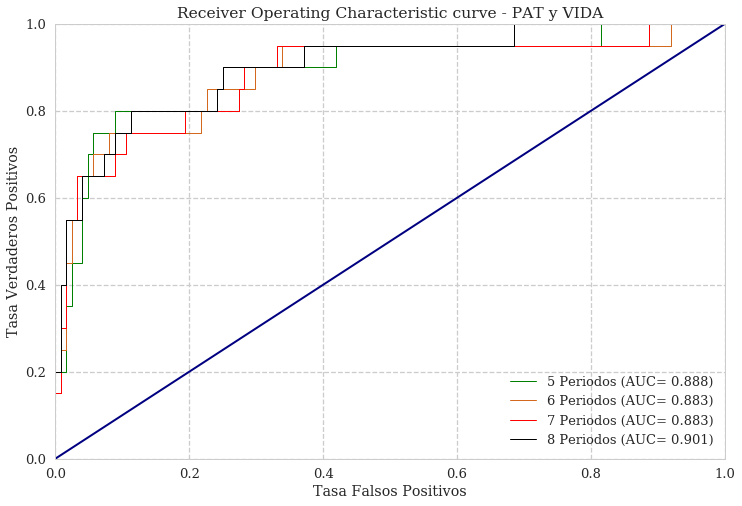

In [82]:
plt.figure(figsize=(12,8))
plt.plot(fps1,tps1, color='g',
         lw=1, label='5 Periodos (AUC= %0.3f)' % metrics.auc(fps1,tps1))
plt.plot(fps2,tps2, color='chocolate',
         lw=1, label='6 Periodos (AUC= %0.3f)' % metrics.auc(fps2,tps2))
plt.plot(fps3,tps3, color='red',
         lw=1, label='7 Periodos (AUC= %0.3f)' % metrics.auc(fps3,tps3))
plt.plot(fps4,tps4, color='k',
         lw=1, label='8 Periodos (AUC= %0.3f)' % metrics.auc(fps4,tps4))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Receiver Operating Characteristic curve - PAT y VIDA')
plt.legend()#(loc="right")
plt.show()

<h2>Purebas con PCA - LGB</h2>

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [84]:
#Instanciamos el modelo de normalizacion
se=StandardScaler()

<h4>Determinacion de componentes</h4>

In [86]:
#Primero se realiza la normaliación y el cálculo de los componentes principales
comp_princ=PCA(0.95).fit(se.fit_transform(X))
print('Cantidad de componentes principales:',comp_princ.n_components_)

Cantidad de componentes principales: 90


In [87]:
X_pca=pd.DataFrame(PCA(n_components=90).fit_transform(X))

<h3>Prueba con 5 períodos - Reduccion 65 columnas- LGB</h3>

In [88]:
pca1=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv1,scoring='roc_auc', verbose= 2,n_jobs=4)
pca1.fit(X_pca,y)

Fitting 8 folds for each of 400 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 271 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 677 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done 1243 tasks      | elapsed:   29.3s
[Parallel(n_jobs=4)]: Done 1973 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done 3193 out of 3200 | elapsed:  1.1min remaining:    0.1s
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  1.1min finished


RandomizedSearchCV(cv=[(array([  0,   1, ..., 641, 642]), array([1033, 1034, ..., 1161, 1162])), (array([128, 129, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([256, 257, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 384,  385, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564]...5, ..., 1969, 1970])), (array([ 903,  904, ..., 1563, 1564]), array([1971, 1972, ..., 2110, 2111]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
          param_distributions={'class_weight': [{1: 0.7, 0: 0.3}, {1

In [89]:
print(pca1.best_params_)
print(pca1.best_score_)

{'class_weight': {1: 0.8, 0: 0.2}, 'colsample_bytree': 0.7317054058059795, 'gamma': 3.207729337549189, 'learning_rate': 0.17105446363984578, 'max_depth': 14, 'min_child_weight': 6.7661874402695545, 'n_estimators': 328, 'reg_alpha': 3.488223921779255, 'subsample': 0.8787856216260524}
0.828900926217944


<p> Instanciamos el modelo y lo evaluamos en test - 5 periodos</p>

In [93]:
pca_lgbm1 = pca1.best_estimator_
pca_lgbm1.fit(X_pca.iloc[np.arange(1656,2253)],y[1656:2253])

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.8, 0: 0.2},
        colsample_bytree=0.7317054058059795, gamma=3.207729337549189,
        learning_rate=0.17105446363984578, max_depth=14,
        min_child_samples=20, min_child_weight=6.7661874402695545,
        min_split_gain=0.0, n_estimators=328, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=3.488223921779255,
        reg_lambda=0.0, silent=True, subsample=0.8787856216260524,
        subsample_for_bin=200000, subsample_freq=0)

In [94]:
#Guardamos las variables para graficos
fppca1,tppca1,_=metrics.roc_curve(y_true=y_test,y_score=pca_lgbm1.predict_proba(X_pca.iloc[2678:])[:,1])

In [95]:
print(metrics.classification_report(y_test,y_pred=pca_lgbm1.predict(X_pca.iloc[2678:])))
print(metrics.confusion_matrix(y_test,y_pred=pca_lgbm1.predict(X_pca.iloc[2678:])))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=pca_lgbm1.predict_proba(X_pca.iloc[2678:])[:,1]))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       124
          1       0.67      0.50      0.57        20

avg / total       0.89      0.90      0.89       144

[[119   5]
 [ 10  10]]
ROC-AUC: 0.8959677419354839


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h3>Prueba con 6 períodos - Reduccion 65 columnas- LGB</h3>

In [96]:
pca2=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv2,scoring='roc_auc', verbose= 2,n_jobs=4)
pca2.fit(X_pca,y)

Fitting 6 folds for each of 400 candidates, totalling 2400 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 468 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 1280 tasks      | elapsed:   34.5s
[Parallel(n_jobs=4)]: Done 2400 out of 2400 | elapsed:  1.0min finished


RandomizedSearchCV(cv=[(array([  0,   1, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([128, 129, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 256,  257, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 384,  385, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 513,  514, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833])), (array([ 643,  644, ..., 1429, 1430]), array([1834, 1835, ..., 1969, 1970]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
        

In [97]:
print(pca2.best_params_)
print(pca2.best_score_)

{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.9773175421545006, 'gamma': 2.7489005491847984, 'learning_rate': 0.0673116140993762, 'max_depth': 6, 'min_child_weight': 2.206409923990577, 'n_estimators': 219, 'reg_alpha': 2.1297392689146153, 'subsample': 0.9511493896659869}
0.8472200612143941


<p> Instanciamos el modelo y lo evaluamos en test - 6 periodos</p>

In [98]:
pca_lgbm2 = pca2.best_estimator_
pca_lgbm2.fit(X_pca.iloc[np.arange(1431,2253)],y[1431:2253])

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.75, 0: 0.25},
        colsample_bytree=0.9773175421545006, gamma=2.7489005491847984,
        learning_rate=0.0673116140993762, max_depth=6,
        min_child_samples=20, min_child_weight=2.206409923990577,
        min_split_gain=0.0, n_estimators=219, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=2.1297392689146153,
        reg_lambda=0.0, silent=True, subsample=0.9511493896659869,
        subsample_for_bin=200000, subsample_freq=0)

In [103]:
#Guardamos las variables para graficos
fppca2,tppca2,_=metrics.roc_curve(y_true=y_test,y_score=pca_lgbm2.predict_proba(X_pca.iloc[2678:])[:,1])

In [104]:
print(metrics.classification_report(y_test,y_pred=pca_lgbm2.predict(X_pca.iloc[2678:])))
print(metrics.confusion_matrix(y_test,y_pred=pca_lgbm2.predict(X_pca.iloc[2678:])))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=pca_lgbm2.predict_proba(X_pca.iloc[2678:])[:,1]))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       124
          1       0.60      0.30      0.40        20

avg / total       0.85      0.88      0.86       144

[[120   4]
 [ 14   6]]
ROC-AUC: 0.9032258064516129


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h3>Prueba con 7 períodos - Reduccion 65 columnas- LGB</h3>

In [101]:
pca3=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv3,scoring='roc_auc', verbose= 2,n_jobs=4)
pca3.fit(X_pca,y)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 202 tasks      | elapsed:    8.5s
[Parallel(n_jobs=4)]: Done 608 tasks      | elapsed:   20.1s
[Parallel(n_jobs=4)]: Done 1174 tasks      | elapsed:   34.9s
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:   45.7s finished


RandomizedSearchCV(cv=[(array([  0,   1, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 128,  129, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 256,  257, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 384,  385, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
          param_distributions={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimators': <scipy.stats._distn_infrastructure.rv_f

In [84]:
print(pca3.best_params_)
print(pca3.best_score_)

{'class_weight': {1: 0.7, 0: 0.3}, 'colsample_bytree': 0.9899369666945262, 'gamma': 0.28504417298802487, 'learning_rate': 0.26725384934292334, 'max_depth': 6, 'min_child_weight': 1.118570709806145, 'n_estimators': 65, 'reg_alpha': 3.5110585597738417, 'subsample': 0.9416428628225247}
0.77596041843319


<p> Instanciamos el modelo y lo evaluamos en test - 7 periodos</p>

In [102]:
pca_lgbm3 = pca3.best_estimator_
pca_lgbm3.fit(X_pca.iloc[np.arange(1297,2253)],y[1297:2253])

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.7, 0: 0.3},
        colsample_bytree=0.9545273632978679, gamma=3.253097774160473,
        learning_rate=0.11588532697535064, max_depth=19,
        min_child_samples=20, min_child_weight=2.9913208948504058,
        min_split_gain=0.0, n_estimators=245, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=0.9778733324192068,
        reg_lambda=0.0, silent=True, subsample=0.9871033690174974,
        subsample_for_bin=200000, subsample_freq=0)

In [105]:
#Guardamos las variables para graficos
fppca3,tppca3,_=metrics.roc_curve(y_true=y_test,y_score=pca_lgbm3.predict_proba(X_pca.iloc[2678:])[:,1])

In [106]:
print(metrics.classification_report(y_test,y_pred=pca_lgbm3.predict(X_pca.iloc[2678:])))
print(metrics.confusion_matrix(y_test,y_pred=pca_lgbm3.predict(X_pca.iloc[2678:])))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=pca_lgbm3.predict_proba(X_pca.iloc[2678:])[:,1]))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95       124
          1       1.00      0.30      0.46        20

avg / total       0.91      0.90      0.88       144

[[124   0]
 [ 14   6]]
ROC-AUC: 0.8762096774193548


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h3>Prueba con 8 períodos - Reduccion 65 columnas- LGB</h3>

In [107]:
pca4=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv4,scoring='roc_auc', verbose= 2,n_jobs=4)
pca4.fit(X_pca,y)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 251 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 657 tasks      | elapsed:   21.7s
[Parallel(n_jobs=4)]: Done 793 out of 800 | elapsed:   25.5s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:   25.6s finished


RandomizedSearchCV(cv=[(array([   0,    1, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 128,  129, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698]))],
          error_score='raise',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=23,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=True, n_iter=400, n_jobs=4,
          param_distributions={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029F9BF05278>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029F9BF05F98>, 'learning_rate': <scipy...

In [108]:
print(pca4.best_params_)
print(pca4.best_score_)

{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.9616945047345097, 'gamma': 5.75672764959292, 'learning_rate': 0.38557053420165344, 'max_depth': 13, 'min_child_weight': 1.0536225561467374, 'n_estimators': 323, 'reg_alpha': 3.1255811751137994, 'subsample': 0.8806823717934245}
0.8761881610991967


<p> Instanciamos el modelo y lo evaluamos en test - 8 periodos</p>

In [109]:
pca_lgbm4 = pca4.best_estimator_
pca_lgbm4.fit(X_pca.iloc[np.arange(1163,2253)],y[1163:2253])

LGBMClassifier(boosting_type='gbdt', class_weight={1: 0.75, 0: 0.25},
        colsample_bytree=0.9616945047345097, gamma=5.75672764959292,
        learning_rate=0.38557053420165344, max_depth=13,
        min_child_samples=20, min_child_weight=1.0536225561467374,
        min_split_gain=0.0, n_estimators=323, n_jobs=-1, num_leaves=31,
        objective=None, random_state=23, reg_alpha=3.1255811751137994,
        reg_lambda=0.0, silent=True, subsample=0.8806823717934245,
        subsample_for_bin=200000, subsample_freq=0)

In [110]:
#Guardamos las variables para graficos
fppca4,tppca4,_=metrics.roc_curve(y_true=y_test,y_score=pca_lgbm4.predict_proba(X_pca.iloc[2678:])[:,1])

In [111]:
print(metrics.classification_report(y_test,y_pred=pca_lgbm4.predict(X_pca.iloc[2678:])))
print(metrics.confusion_matrix(y_test,y_pred=pca_lgbm4.predict(X_pca.iloc[2678:])))
print('ROC-AUC:',metrics.roc_auc_score(y_test,y_score=pca_lgbm4.predict_proba(X_pca.iloc[2678:])[:,1]))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93       124
          1       0.71      0.25      0.37        20

avg / total       0.87      0.88      0.86       144

[[122   2]
 [ 15   5]]
ROC-AUC: 0.8875


C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Diego\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<h2>Grafico Resumen - PCA - LGB</h2>

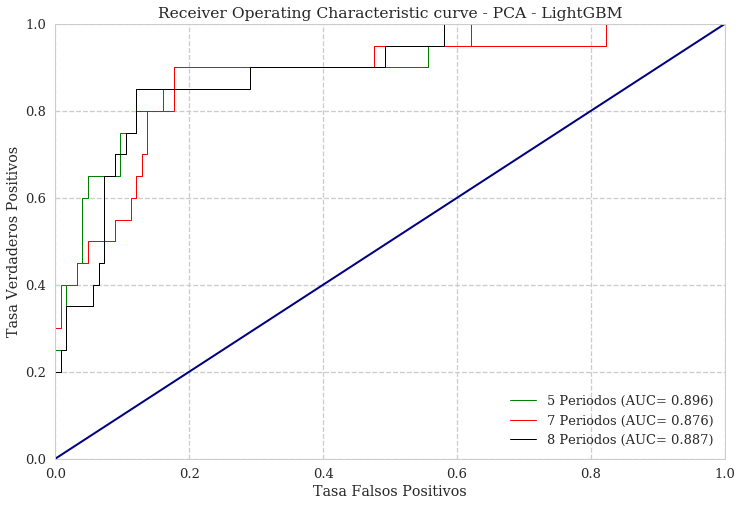

In [112]:
plt.figure(figsize=(12,8))
plt.plot(fppca1,tppca1, color='g',
         lw=1, label='5 Periodos (AUC= %0.3f)' % metrics.auc(fppca1,tppca1))
#plt.plot(fppca2,tppca2, color='chocolate',
 #        lw=1, label='6 Periodos (AUC= %0.3f)' % metrics.auc(fppca2,tppca2))
plt.plot(fppca3,tppca3, color='red',
         lw=1, label='7 Periodos (AUC= %0.3f)' % metrics.auc(fppca3,tppca3))
plt.plot(fppca4,tppca4, color='k',
         lw=1, label='8 Periodos (AUC= %0.3f)' % metrics.auc(fppca4,tppca4))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Receiver Operating Characteristic curve - PCA - LightGBM')
plt.legend()#(loc="right")
plt.show()

In [113]:
#Guardamos los resultados por pruebas
result_1_pca=pd.DataFrame(data={'prueba':1,
                    'score':pca_lgbm1.predict_proba(X_pca.iloc[2678:])[:,1],'real':y_test},index=rango)

result_2_pca=pd.DataFrame(data={'prueba':2,
                   'score':pca_lgbm2.predict_proba(X_pca.iloc[2678:])[:,1],'real':y_test},index=rango)

result_3_pca=pd.DataFrame(data={'prueba':3,
                    'score':pca_lgbm3.predict_proba(X_pca.iloc[2678:])[:,1],'real':y_test},index=rango)

result_4_pca=pd.DataFrame(data={'prueba':4,
                    'score':pca_lgbm4.predict_proba(X_pca.iloc[2678:])[:,1],'real':y_test},index=rango)

result_pca=pd.concat([result_1_pca,result_2_pca,result_3_pca,result_4_pca],ignore_index=False)

In [114]:
result_pca.to_csv('Resultados_PCA-solo_pyv.csv',index=False)
result_random_forest.to_csv('Resultados_Random_Forest-solo_pyv.csv',index=False)
result_lightgb.to_csv('Resultados_LightGBM-solo_pyv.csv',index=False)

<h1> Clustering </h1>

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet,fcluster
from scipy.spatial.distance import pdist
import os

In [64]:
#Probamos el cluster sobre el último periodo
C=se.fit_transform(cv.iloc[2678:,((cv.columns!='y')&(cv.columns!='y2')&(cv.columns!='cod_cia')&
                                  (cv.columns!='tipo')&(cv.columns!='bloque'))]).copy()

In [65]:
Z = linkage(C, 'complete')

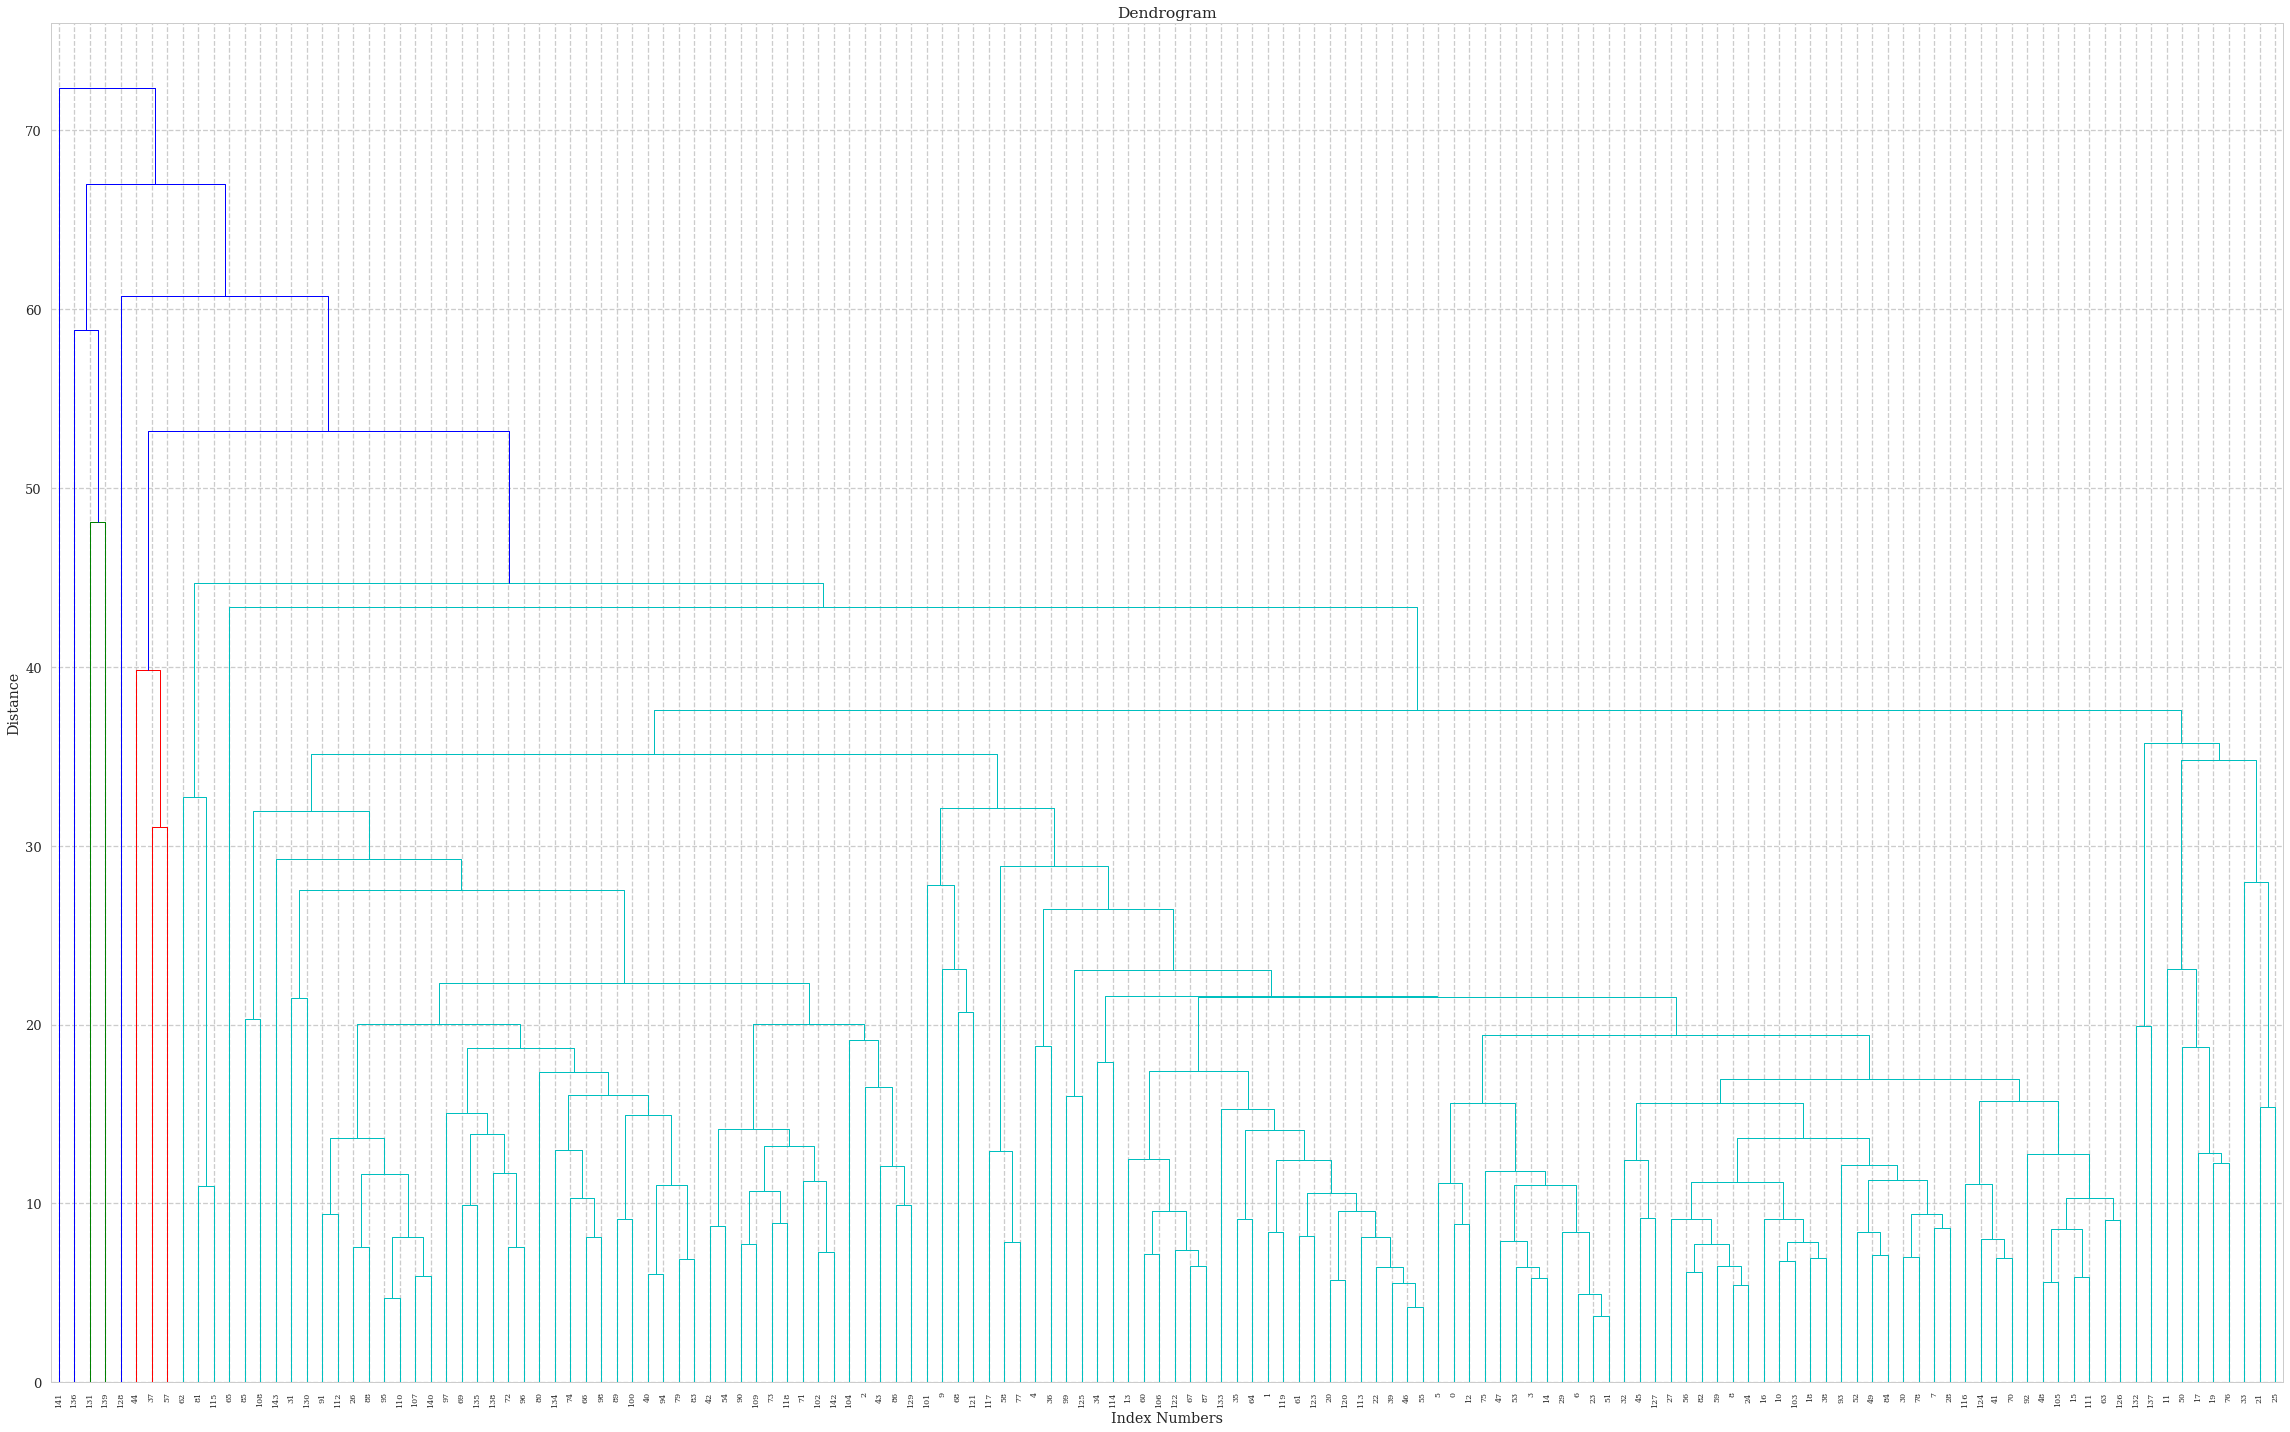

In [66]:
plt.figure(figsize=[40,25])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [67]:
comp, coph_dists = cophenet(Z, pdist(C))
comp

0.8575486114665617

In [68]:
Z1 = linkage(C, 'ward')

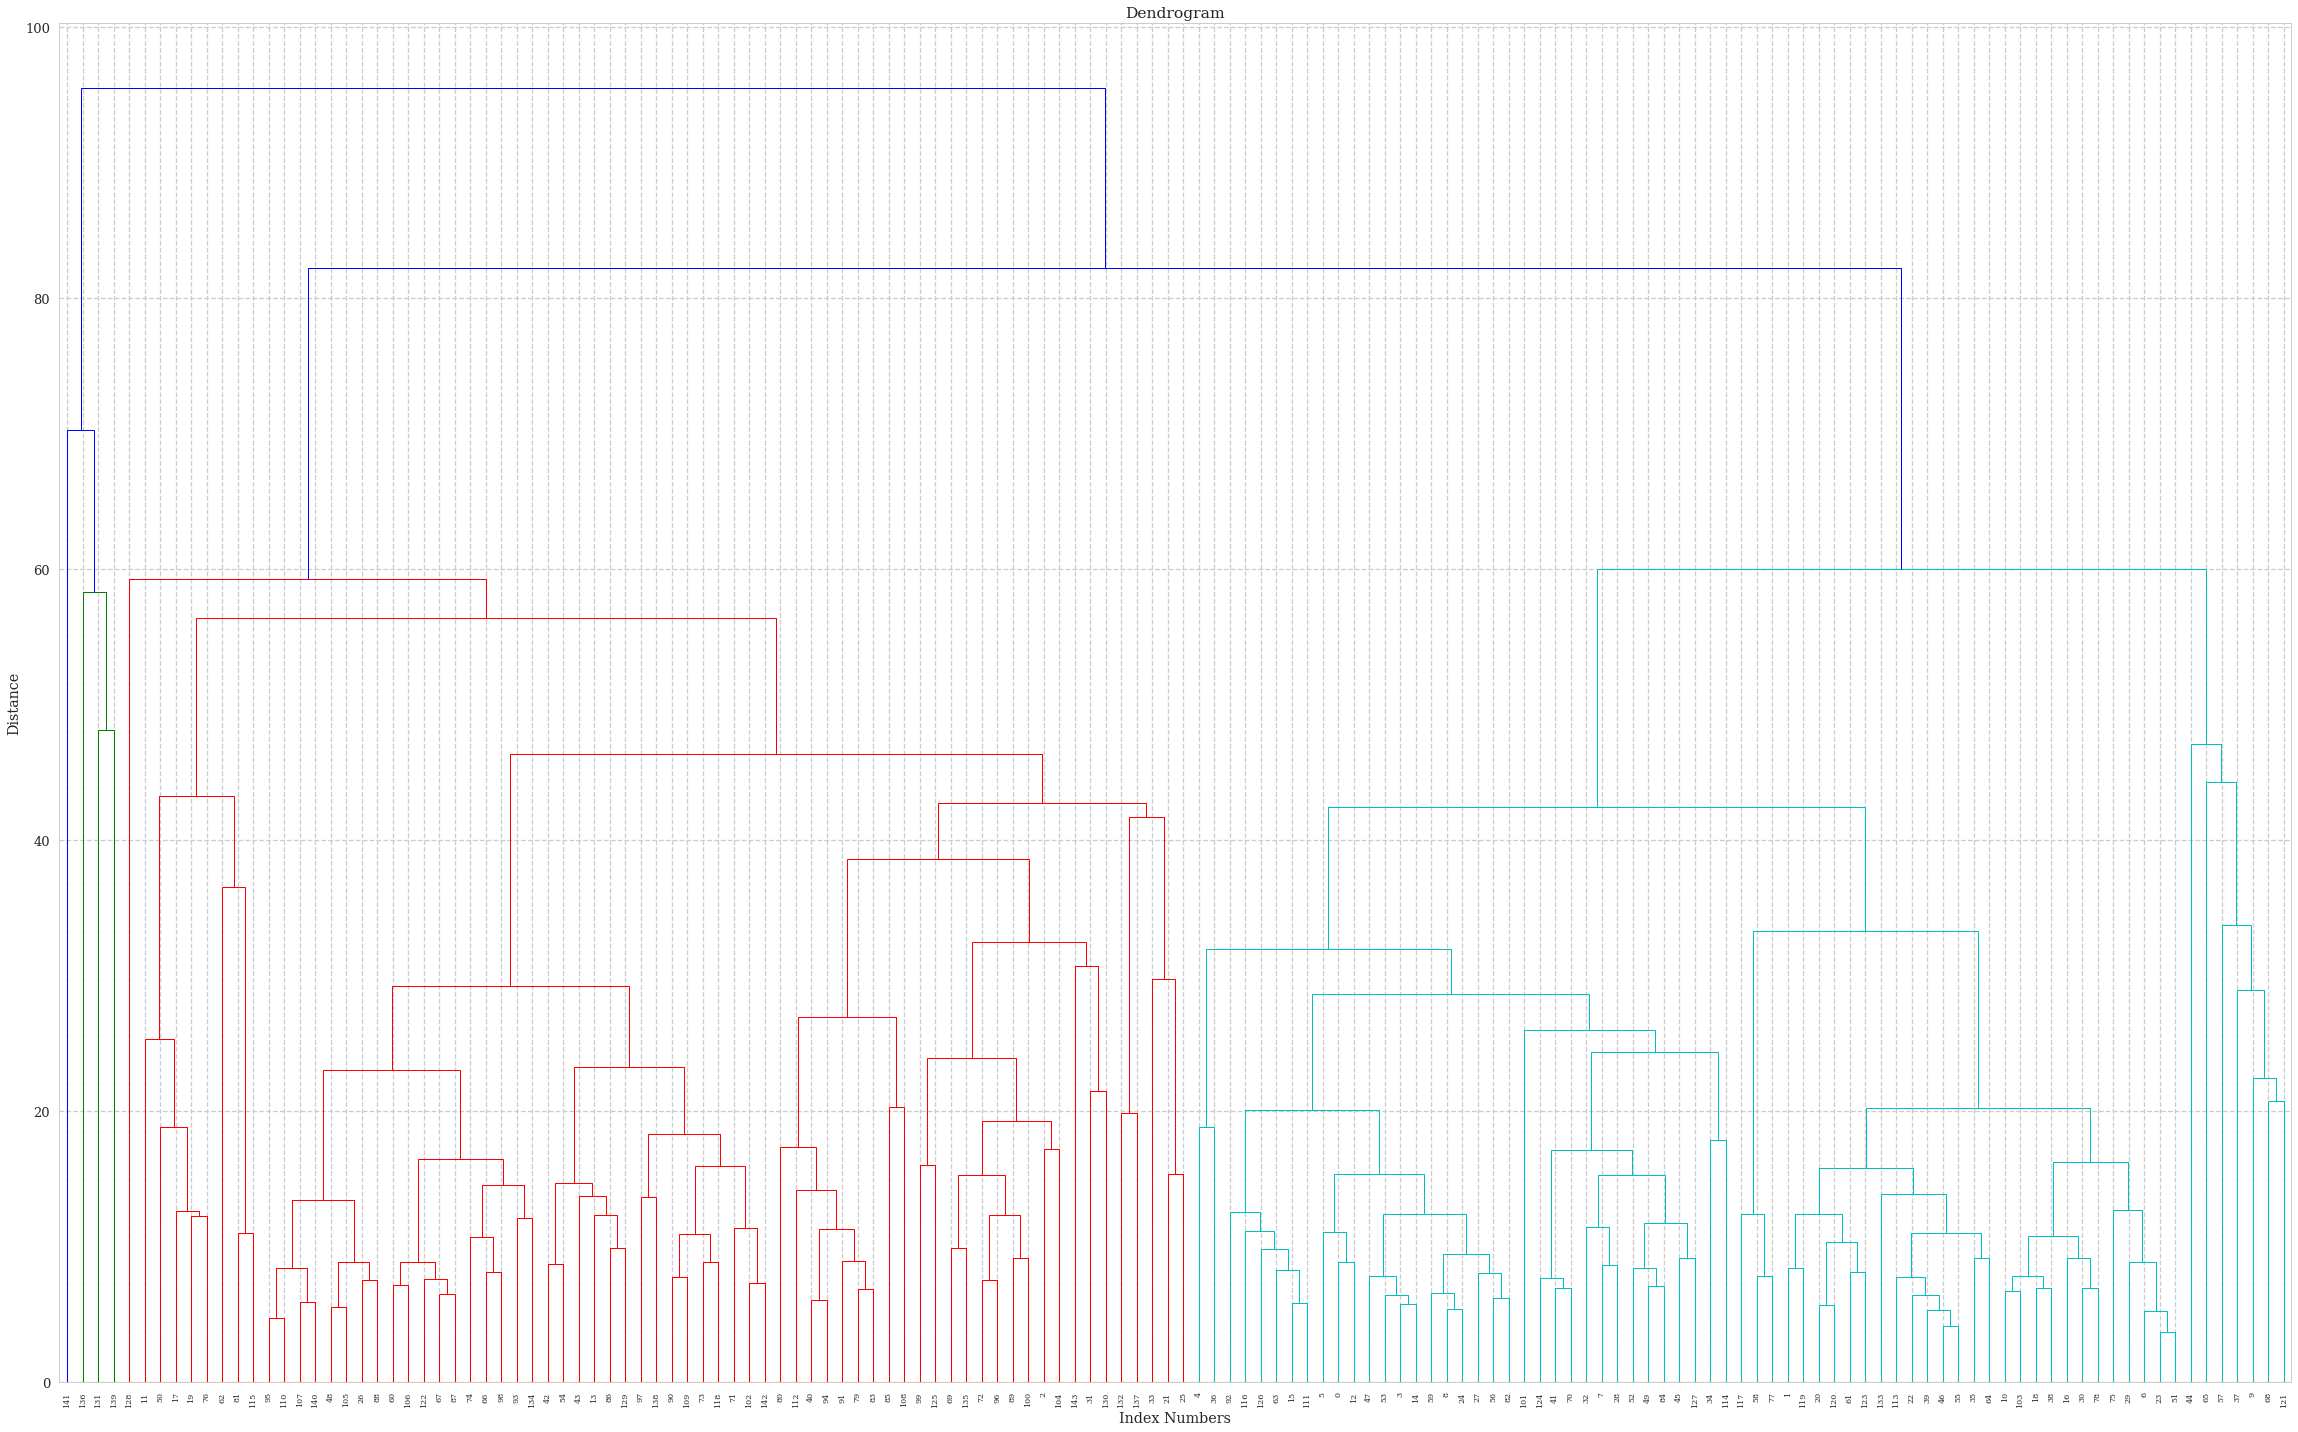

In [69]:
plt.figure(figsize=[40,25])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z1,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [70]:
wa, coph_dists = cophenet(Z1, pdist(C))
wa

0.4493952703331439

C:\Users\ssn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


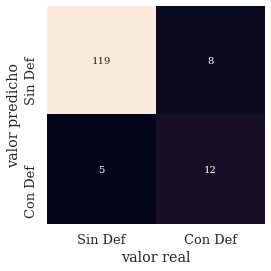

In [74]:
%matplotlib inline
mat = metrics.confusion_matrix(y_test,y_pred=opt_lgbm4.predict(X_test))
sb.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho');